# 주성분 분석(Principal Component Analysis, PCA)
---
**주성분 분석**(PCA): 특성 사이의 상관관계를 기반으로 하여 데이터에 있는 특성을 잡아냄
- 비지도 선형 변환 기법으로 특성 추출과 차원 축소 용도로 사용됨

**PCA 단계**
1. 데이터를 포준화 전처리
2. 공분산 행렬을 구성
3. 공분산 행렬의 고유값과 고유 벡터를 구함
4. 고유값을 내림차순으로 정렬하여 고유 벡터의 순위를 매김

# 비지도 학습(주성분 분석) 실습
---
**데이터셋**: iris(붓꽃 데이터셋)
- Iris-setosa, Iris-versicolor, Iris-virginica 세 종류 150개의 붓꽃 샘플

**다중 분류**(Multiclass Classification): **결정 트리**(Decision Tree)

**주성분 분석**(PCA)

### 필요한 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 준비 & 전처리

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- X, y 분리

In [6]:
X = df.drop(['target'], axis=1)
y = df['target']

- 데이터 분리(train, test)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120,) (30,)


In [8]:
# stratify 적용
y_train.value_counts()

0    40
2    40
1    40
Name: target, dtype: int64

In [9]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),120.0,5.841667,0.840926,4.3,5.1,5.75,6.400,7.9
sepal width (cm),120.0,3.048333,0.448524,2.0,2.8,3.00,3.325,4.4
petal length (cm),120.0,3.770000,1.768520,1.1,1.6,4.25,5.100,6.9
petal width (cm),120.0,1.205000,0.762663,0.1,0.3,1.30,1.800,2.5


### 표준화(Standardization)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train[:5]

array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
       [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ],
       [ 1.14439475, -0.5559895 ,  0.58484978,  0.25675496],
       [-1.12449223,  0.11567567, -1.28894078, -1.45494479],
       [-0.40800161, -1.22765467,  0.13059752,  0.12508575]])

### 차원 축소
- **주성분 분석**(PCA)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_train[:5]

array([[-2.35430673, -1.03369922],
       [ 0.32811646, -1.48461375],
       [ 1.2290844 , -0.08852476],
       [-2.19452009, -0.41449679],
       [ 0.24248823, -1.27773347]])

In [12]:
df = pd.DataFrame(X_train, columns=['X_1', 'X_2'])
df.head()

,X_1,X_2
0,-2.354307,-1.033699
1,0.328116,-1.484614
2,1.229084,-0.088525
3,-2.194520,-0.414497
4,0.242488,-1.277733


In [13]:
df['y_train'] = y_train.values
df.head()

,X_1,X_2,y_train
0,-2.354307,-1.033699,0
1,0.328116,-1.484614,2
2,1.229084,-0.088525,1
3,-2.194520,-0.414497,0
4,0.242488,-1.277733,1


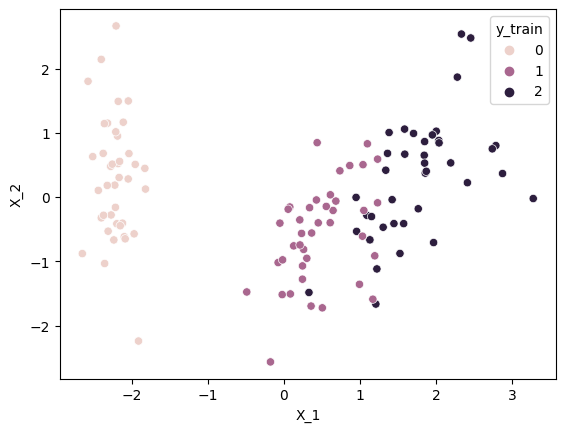

In [14]:
sns.scatterplot(data=df, x='X_1', y='X_2', hue='y_train')
plt.show()

### 학습
- **다중 분류**(Multiclass Classification): **결정 트리**(Decision Tree)

In [15]:
df_X = df[['X_1', 'X_2']].values
df_y = df['y_train'].values
print(type(df_X), type(df_y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(df_X, df_y)

DecisionTreeClassifier(max_depth=3)

### 평가

In [17]:
clf.score(df_X, df_y)

0.9333333333333333